Graph successfully loaded with 1226 nodes and 2615 edges.


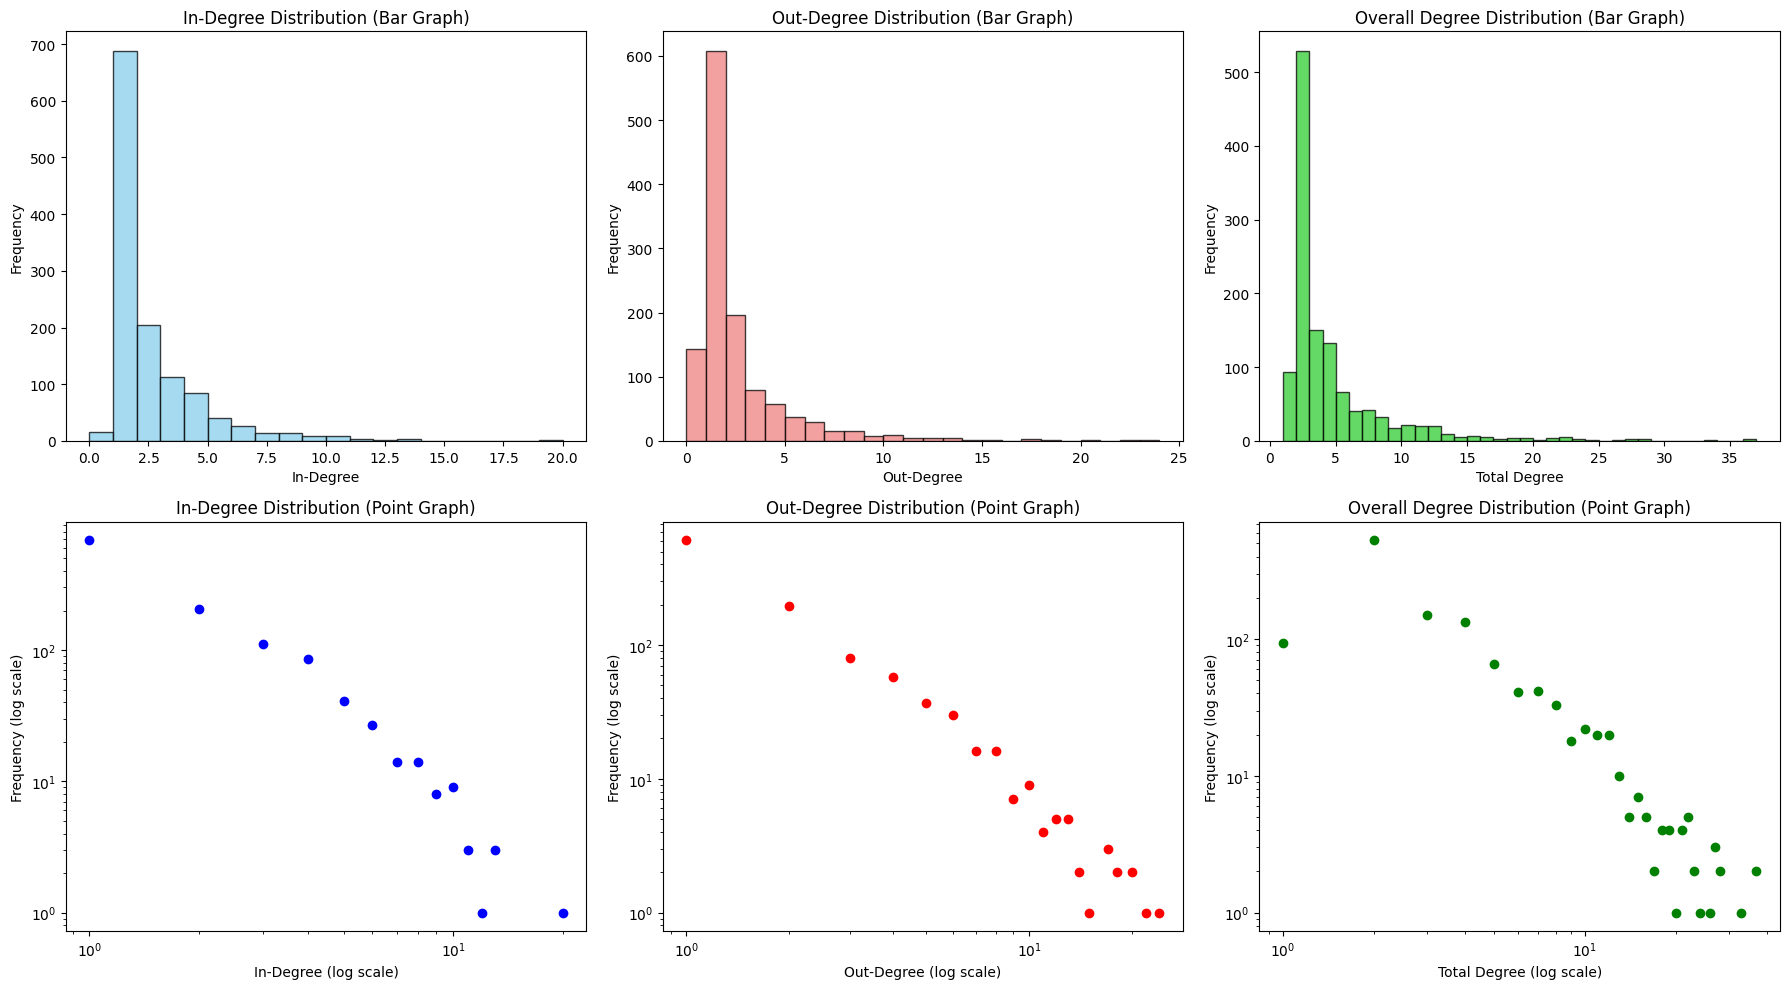

+---------------+-------+-------+-------+-----------+
| Degree Type   |   Max |   Min |   Avg |   Std Dev |
+===============+=======+=======+=======+===========+
| In-Degree     |    20 |     0 |  2.13 |      1.99 |
+---------------+-------+-------+-------+-----------+
| Out-Degree    |    24 |     0 |  2.13 |      2.68 |
+---------------+-------+-------+-------+-----------+
| Total Degree  |    37 |     1 |  4.27 |      4.33 |
+---------------+-------+-------+-------+-----------+


In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

file_path = r"/Users/harshil/SNUC_Subjects/Sem 6/SNA/SNA - Air Traffic Control/out.maayan-faa"

# Read file while ignoring comments
with open(file_path, "r") as f:
    edges = [line.strip().split()[:2] for line in f if not line.startswith("%")]  # Read only first two columns

# Convert node IDs to integers
edges = [(int(u), int(v)) for u, v in edges]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

print("Graph successfully loaded with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges.")

# Compute in-degree, out-degree, and overall degree
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]
total_degrees = [d for _, d in G.degree()]  # Sum of in-degree and out-degree

# Compute unique degree values and their frequencies
unique_in_degrees, in_counts = np.unique(in_degrees, return_counts=True)
unique_out_degrees, out_counts = np.unique(out_degrees, return_counts=True)
unique_total_degrees, total_counts = np.unique(total_degrees, return_counts=True)

# Plot settings
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Bar Graphs (Top Row)
axs[0, 0].hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), edgecolor="black", alpha=0.75, color="skyblue")
axs[0, 0].set_xlabel("In-Degree")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].set_title("In-Degree Distribution (Bar Graph)")

axs[0, 1].hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), edgecolor="black", alpha=0.75, color="lightcoral")
axs[0, 1].set_xlabel("Out-Degree")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].set_title("Out-Degree Distribution (Bar Graph)")

axs[0, 2].hist(total_degrees, bins=range(min(total_degrees), max(total_degrees) + 1), edgecolor="black", alpha=0.75, color="limegreen")
axs[0, 2].set_xlabel("Total Degree")
axs[0, 2].set_ylabel("Frequency")
axs[0, 2].set_title("Overall Degree Distribution (Bar Graph)")

# Point Graphs (Bottom Row - Log-Log Scale)
axs[1, 0].scatter(unique_in_degrees, in_counts, color="blue")
axs[1, 0].set_xscale("log")
axs[1, 0].set_yscale("log")
axs[1, 0].set_xlabel("In-Degree (log scale)")
axs[1, 0].set_ylabel("Frequency (log scale)")
axs[1, 0].set_title("In-Degree Distribution (Point Graph)")

axs[1, 1].scatter(unique_out_degrees, out_counts, color="red")
axs[1, 1].set_xscale("log")
axs[1, 1].set_yscale("log")
axs[1, 1].set_xlabel("Out-Degree (log scale)")
axs[1, 1].set_ylabel("Frequency (log scale)")
axs[1, 1].set_title("Out-Degree Distribution (Point Graph)")

axs[1, 2].scatter(unique_total_degrees, total_counts, color="green")
axs[1, 2].set_xscale("log")
axs[1, 2].set_yscale("log")
axs[1, 2].set_xlabel("Total Degree (log scale)")
axs[1, 2].set_ylabel("Frequency (log scale)")
axs[1, 2].set_title("Overall Degree Distribution (Point Graph)")

plt.tight_layout()
plt.show()

# Calculate in-degree, out-degree, and total degree
in_degrees = [d for _, d in G.in_degree()]
out_degrees = [d for _, d in G.out_degree()]
total_degrees = [d for _, d in G.degree()]

# Compute statistics
degree_stats = [
    ["In-Degree", max(in_degrees), min(in_degrees), round(np.mean(in_degrees), 2), round(np.std(in_degrees), 2)],
    ["Out-Degree", max(out_degrees), min(out_degrees), round(np.mean(out_degrees), 2), round(np.std(out_degrees), 2)],
    ["Total Degree", max(total_degrees), min(total_degrees), round(np.mean(total_degrees), 2), round(np.std(total_degrees), 2)]
]

# Print table
print(tabulate(degree_stats, headers=["Degree Type", "Max", "Min", "Avg", "Std Dev"], tablefmt="grid"))

In [19]:
pip install --upgrade networkx matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


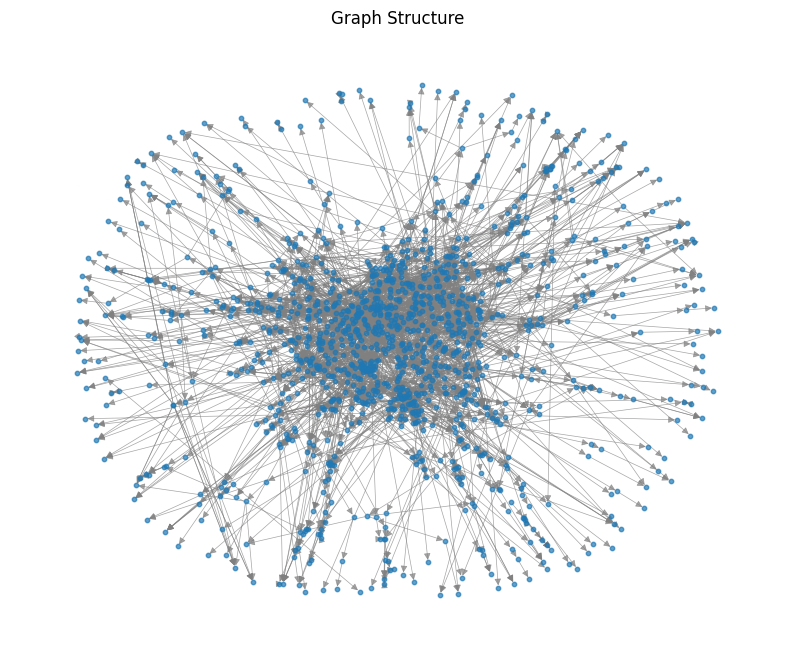

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, ax=ax, node_size=10, edge_color="gray", alpha=0.7, width=0.5)  
plt.title("Graph Structure")  
plt.show()


In [25]:
# ------------------------- Centrality Measures ------------------------- #
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0)
pagerank_centrality = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

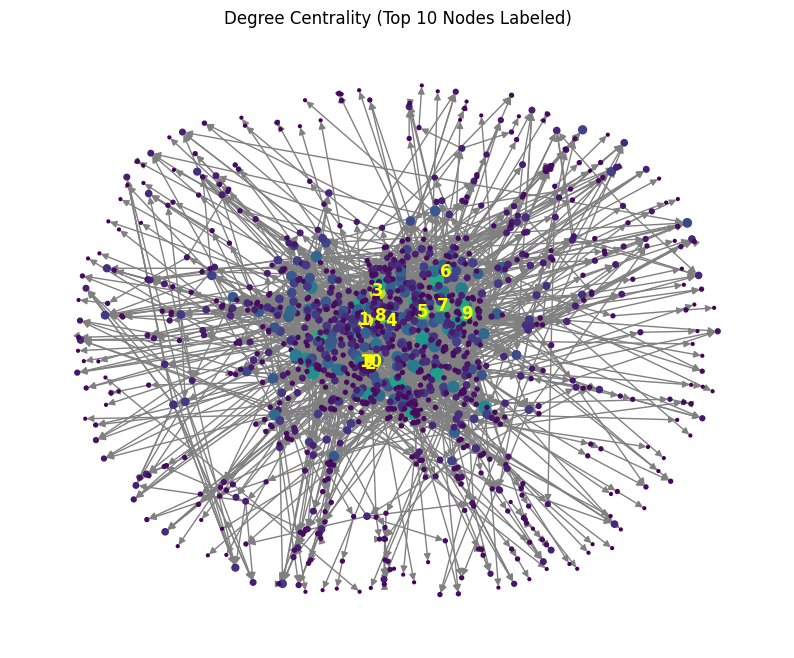

+--------+--------+----------+--------------+
|   Rank |   Node |   Degree |   Centrality |
+========+========+==========+==============+
|      1 |     68 |       37 |    0.0302041 |
+--------+--------+----------+--------------+
|      2 |    312 |       37 |    0.0302041 |
+--------+--------+----------+--------------+
|      3 |     52 |       33 |    0.0269388 |
+--------+--------+----------+--------------+
|      4 |     44 |       28 |    0.0228571 |
+--------+--------+----------+--------------+
|      5 |    113 |       28 |    0.0228571 |
+--------+--------+----------+--------------+
|      6 |     47 |       27 |    0.0220408 |
+--------+--------+----------+--------------+
|      7 |    110 |       27 |    0.0220408 |
+--------+--------+----------+--------------+
|      8 |    187 |       27 |    0.0220408 |
+--------+--------+----------+--------------+
|      9 |     89 |       26 |    0.0212245 |
+--------+--------+----------+--------------+
|     10 |    135 |       24 |    

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Compute degree centrality and degree
degree_centrality = nx.degree_centrality(G)
degrees = dict(G.degree())  # Get node degrees

# Get the top 10 nodes by degree centrality
top_10_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Node, Degree, Centrality)
table_data = [(i, node, degrees[node], centrality) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers = ["Rank", "Node", "Degree", "Centrality"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * degree_centrality[node] for node in G]  # Scale node size
node_colors = list(degree_centrality.values())  # Node colors based on centrality

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Degree Centrality (Top 10 Nodes Labeled)")
plt.show()

# Print the table using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

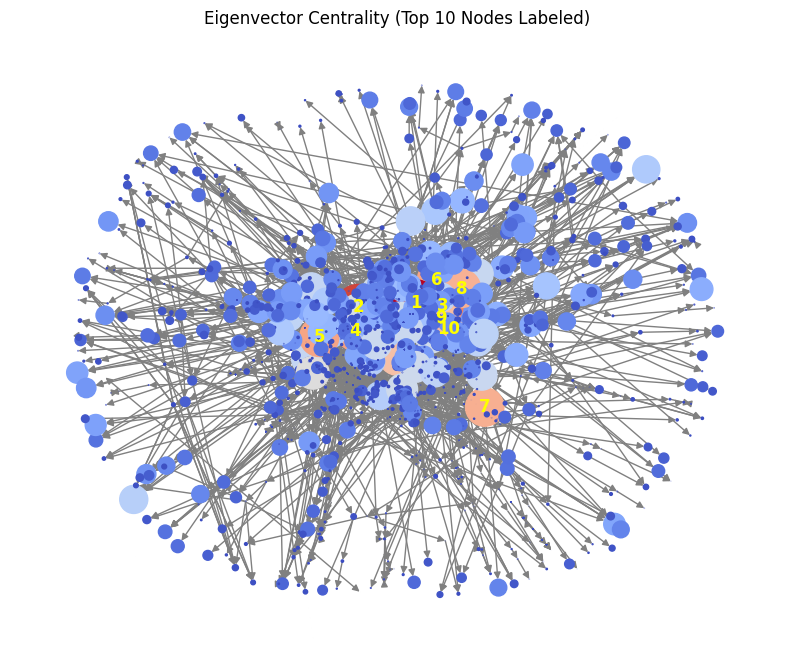

+--------+--------+----------+--------------------------+
|   Rank |   Node |   Degree |   Eigenvector Centrality |
+========+========+==========+==========================+
|      1 |    116 |       22 |                 0.219207 |
+--------+--------+----------+--------------------------+
|      2 |     34 |       22 |                 0.202734 |
+--------+--------+----------+--------------------------+
|      3 |    110 |       27 |                 0.177008 |
+--------+--------+----------+--------------------------+
|      4 |     10 |       21 |                 0.159781 |
+--------+--------+----------+--------------------------+
|      5 |     46 |       23 |                 0.158224 |
+--------+--------+----------+--------------------------+
|      6 |    102 |       23 |                 0.156721 |
+--------+--------+----------+--------------------------+
|      7 |     66 |       18 |                 0.152374 |
+--------+--------+----------+--------------------------+
|      8 |    

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate

# Compute eigenvector centrality and degree
eigenvector_centrality = nx.eigenvector_centrality(G)
degrees = dict(G.degree())  # Get node degrees

# Get the top 10 nodes by eigenvector centrality
top_10_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Convert to tabular format (Rank, Node, Degree, Centrality)
table_data = [(i, node, degrees[node], centrality) for i, (node, centrality) in enumerate(top_10_nodes, start=1)]
headers = ["Rank", "Node", "Degree", "Eigenvector Centrality"]

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * eigenvector_centrality[node] for node in G]  # Scale node size
node_colors = list(eigenvector_centrality.values())  # Node colors based on centrality

# Draw the graph
nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.coolwarm, edge_color="gray")

# Label the top 10 nodes with numbers 1-10
for i, (node, _) in enumerate(top_10_nodes, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("Eigenvector Centrality (Top 10 Nodes Labeled)")
plt.show()

# Print the table using tabulate
print(tabulate(table_data, headers=headers, tablefmt="grid"))

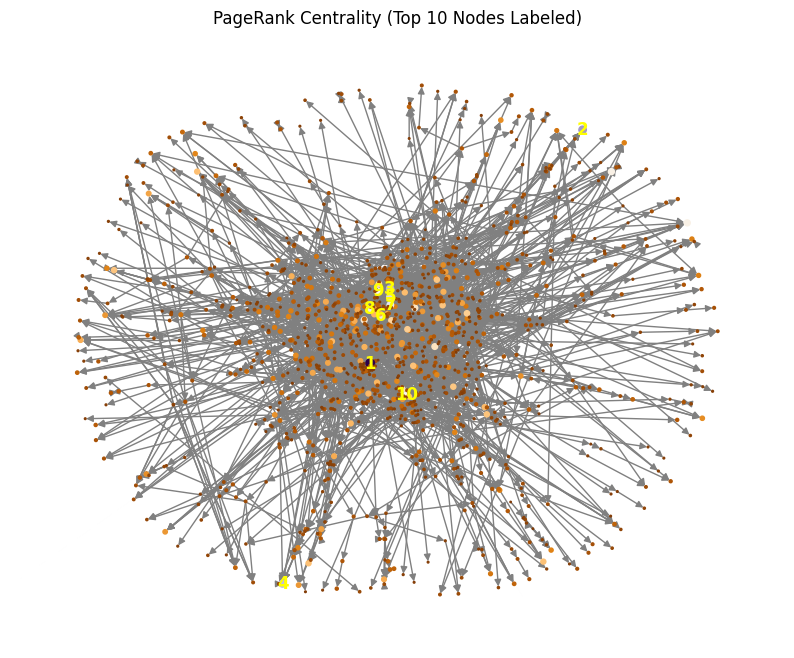


### Top 10 Nodes by PageRank ###
+--------+--------+----------+------------+
|   Rank |   Node |   Degree |   PageRank |
+========+========+==========+============+
|      1 |    312 |       37 | 0.00771213 |
+--------+--------+----------+------------+
|      2 |     61 |        8 | 0.00569385 |
+--------+--------+----------+------------+
|      3 |    105 |       12 | 0.00534362 |
+--------+--------+----------+------------+
|      4 |     19 |        7 | 0.00516462 |
+--------+--------+----------+------------+
|      5 |    842 |        2 | 0.00475402 |
+--------+--------+----------+------------+
|      6 |    187 |       27 | 0.00448052 |
+--------+--------+----------+------------+
|      7 |    578 |        4 | 0.00438123 |
+--------+--------+----------+------------+
|      8 |     86 |       12 | 0.00426945 |
+--------+--------+----------+------------+
|      9 |     52 |       33 | 0.00393365 |
+--------+--------+----------+------------+
|     10 |    311 |       12 | 0.00387802 

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute PageRank Centrality and Degree
pagerank_centrality = nx.pagerank(G)
degrees = dict(G.degree())  # Get node degrees

# Get top 10 nodes by PageRank
top_10_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Tabulate top 10 nodes
table_data = [(i, node, degrees[node], centrality) for i, (node, centrality) in enumerate(top_10_pagerank, start=1)]
headers = ["Rank", "Node", "Degree", "PageRank"]

# Plot PageRank Centrality
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * pagerank_centrality[node] for node in G]  # Scale node sizes
node_colors = list(pagerank_centrality.values())  # Node color by PageRank

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.PuOr, edge_color="gray")

# Label top 10 nodes (1-10)
for i, (node, _) in enumerate(top_10_pagerank, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

plt.title("PageRank Centrality (Top 10 Nodes Labeled)")
plt.show()

print("\n### Top 10 Nodes by PageRank ###")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Average Local Clustering Coefficient: 0.0404


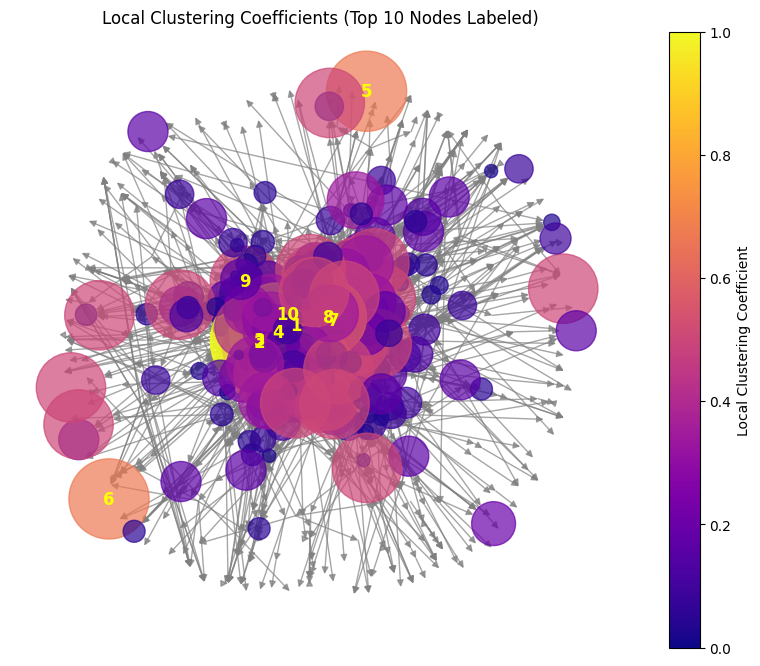


### Top 10 Nodes by Local Clustering Coefficient ###
+--------+--------+----------+--------------------------------+
|   Rank |   Node |   Degree |   Local Clustering Coefficient |
+========+========+==========+================================+
|      1 |    133 |        3 |                       1        |
+--------+--------+----------+--------------------------------+
|      2 |    313 |        2 |                       1        |
+--------+--------+----------+--------------------------------+
|      3 |    385 |        2 |                       1        |
+--------+--------+----------+--------------------------------+
|      4 |    420 |        2 |                       1        |
+--------+--------+----------+--------------------------------+
|      5 |     28 |        3 |                       0.666667 |
+--------+--------+----------+--------------------------------+
|      6 |     29 |        3 |                       0.666667 |
+--------+--------+----------+--------------------

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute Local Clustering Coefficients
local_clustering = nx.clustering(G)
global_clustering = nx.transitivity(G)
average_local_clustering = np.mean(list(local_clustering.values()))
degrees = dict(G.degree())

# Get top 10 nodes by Local Clustering Coefficient
top_10_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:10]

# Tabulate top 10 nodes
table_data = [(i, node, degrees[node], clustering) for i, (node, clustering) in enumerate(top_10_clustering, start=1)]
headers = ["Rank", "Node", "Degree", "Local Clustering Coefficient"]

# Plot Local Clustering Coefficients
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * local_clustering[node] for node in G]  # Scale node sizes
node_colors = list(local_clustering.values())  # Node color by clustering coefficient

nx.draw(G, pos, ax=ax, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.plasma, edge_color="gray", alpha=0.7)

# Label top 10 nodes (1-10)
for i, (node, _) in enumerate(top_10_clustering, start=1):
    x, y = pos[node]
    ax.text(x, y, str(i), fontsize=12, fontweight="bold", ha="center", va="center", color="yellow")

# Fix colorbar issue
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Required for matplotlib
cbar = plt.colorbar(sm, ax=ax)  # Attach colorbar to the current axis
cbar.set_label("Local Clustering Coefficient")

print(f"Average Local Clustering Coefficient: {average_local_clustering:.4f}")

plt.title("Local Clustering Coefficients (Top 10 Nodes Labeled)")
plt.show()

print("\n### Top 10 Nodes by Local Clustering Coefficient ###")
print(tabulate(table_data, headers=headers, tablefmt="grid"))


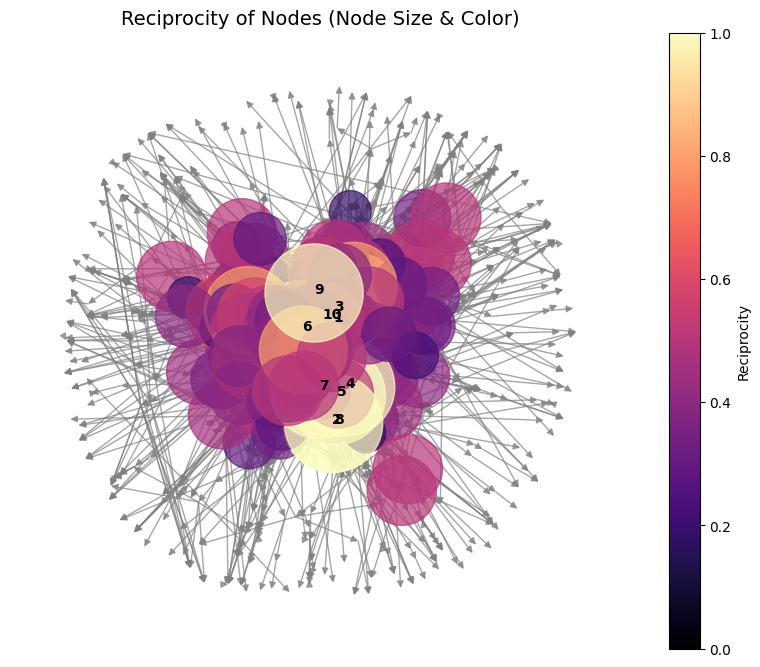


### Top 10 Nodes by Reciprocity ###
+--------+--------+---------------+
|   Rank |   Node |   Reciprocity |
+========+========+===============+
|      1 |    139 |        1      |
+--------+--------+---------------+
|      2 |    211 |        1      |
+--------+--------+---------------+
|      3 |    262 |        1      |
+--------+--------+---------------+
|      4 |    441 |        1      |
+--------+--------+---------------+
|      5 |    442 |        1      |
+--------+--------+---------------+
|      6 |    448 |        1      |
+--------+--------+---------------+
|      7 |    649 |        1      |
+--------+--------+---------------+
|      8 |    774 |        1      |
+--------+--------+---------------+
|      9 |   1094 |        1      |
+--------+--------+---------------+
|     10 |    144 |        0.9091 |
+--------+--------+---------------+


In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Compute reciprocity for each node (excluding None values)
node_reciprocity = {node: nx.reciprocity(G, node) for node in G if nx.reciprocity(G, node) is not None}

# Get top 10 nodes by reciprocity
top_10_reciprocity = sorted(node_reciprocity.items(), key=lambda x: x[1], reverse=True)[:10]

# Print top 10 nodes in tabular format
table_data = [(i, node, round(node_reciprocity[node], 4)) for i, (node, _) in enumerate(top_10_reciprocity, start=1)]
headers = ["Rank", "Node", "Reciprocity"]

# ------------------------- PLOT: Reciprocity ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))
node_sizes = [5000 * node_reciprocity.get(node, 0) for node in G]  # Scale node size
node_colors = [node_reciprocity.get(node, 0) for node in G]  # Set node color

# Draw the graph
nodes = nx.draw(
    G,
    pos,
    ax=ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.magma,
    edge_color="gray",
    alpha=0.7
)

# Label the top 10 nodes in the graph with their ranks (1-10)
for rank, (node, _) in enumerate(top_10_reciprocity, start=1):
    ax.text(pos[node][0], pos[node][1], str(rank), fontsize=10, fontweight="bold", color="black")

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.magma, norm=plt.Normalize(vmin=min(node_reciprocity.values()), vmax=max(node_reciprocity.values())))
sm.set_array([])  # Required for colorbar to work properly
cbar = plt.colorbar(sm, ax=ax, label="Reciprocity")

# Add title
plt.title("Reciprocity of Nodes (Node Size & Color)", fontsize=14)
plt.show()


print("\n### Top 10 Nodes by Reciprocity ###")
print(tabulate(table_data, headers=headers, tablefmt="grid"))
